## Assignment 2 (70 marks)
#### =====================================================================================================
### Deadline: 03/09 11:59 pm
#### =====================================================================================================

### Problem 1: Classification (35 marks)

`lab02_dataset_1.xlsx` contains 10,302 observations on various vehicles. You will use the observations in this dataset to train models that predict the usage of a vehicle. The input features which will be used for your training are *AGE, TRAVTIME, CAR_TYPE, OCCUPATION, EDUCATION* and your output label is the binary class *CAR_USE*, whose values are *Private* and *Commercial*.

### 1.a (2 marks)
For the 5 input features, drop any rows with missing values. Output the new length of the training dataset after you drop the missing values among the input features.

In [1]:
import pandas as pd

data = pd.read_excel('lab02_dataset_1.xlsx')
data = data[['AGE', 'TRAVTIME', 'CAR_TYPE', 'OCCUPATION', 'EDUCATION', 'CAR_USE']]
data = data.dropna(subset=['AGE', 'TRAVTIME', 'CAR_TYPE', 'OCCUPATION', 'EDUCATION'])
length = len(data)

print(data)
print(f"Length of the training dataset after dropping missing values: {length}")

        AGE  TRAVTIME     CAR_TYPE    OCCUPATION      EDUCATION     CAR_USE
0      60.0        14      Minivan  Professional            PhD     Private
1      43.0        22      Minivan   Blue Collar    High School  Commercial
2      48.0        26          Van       Manager      Bachelors     Private
3      35.0         5          SUV      Clerical    High School     Private
4      51.0        32      Minivan   Blue Collar  Below High Sc     Private
...     ...       ...          ...           ...            ...         ...
10297  45.0        21      Minivan       Manager            PhD     Private
10298  46.0        36  Panel Truck       Unknown        Masters  Commercial
10299  48.0        12          SUV   Blue Collar  Below High Sc     Private
10300  50.0        36      Minivan    Home Maker      Bachelors     Private
10301  52.0        64      Minivan      Clerical    High School     Private

[10295 rows x 6 columns]
Length of the training dataset after dropping missing values: 

### 1.b (6 marks)
We want to encode categorical features as an integer array. Look up which sklearn function will allow you to do that and apply that on the input features. Also, remember to standardize your encoded features using `fit_transform` to create your final dataset. Finally, perform a 80-20 split on your dataset (80% for training, 20% for testing).

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

# Identify categorical and numerical features
categorical_features = ['CAR_TYPE', 'OCCUPATION', 'EDUCATION']
numerical_features = ['AGE', 'TRAVTIME']

# Create a column transformer to handle both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

X = data.drop('CAR_USE', axis=1)
y = data['CAR_USE']

X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (8236, 19)
Testing set shape: (2059, 19)


### 1.c (6 marks)

i. Train a logistic regression model using sklearn's [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).
<br>
ii. Train a naive bayes model using sklearn's [`CategoricalNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html) with a laplace smoothing of 0.5.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

X_nb = data.drop('CAR_USE', axis=1)
categorical_features = ['CAR_TYPE', 'OCCUPATION', 'EDUCATION']
numerical_features = ['AGE', 'TRAVTIME']

preprocessor_nb = ColumnTransformer(
    transformers=[
        ('num', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile'), numerical_features),
        ('cat', OneHotEncoder(drop=None, sparse_output=False), categorical_features)
    ])

X_encoded_nb = preprocessor_nb.fit_transform(X_nb)

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_encoded_nb, y, test_size=0.2, random_state=42)

naive_bayes_model = CategoricalNB(alpha=0.5)
naive_bayes_model.fit(X_train_nb, y_train_nb)


CategoricalNB(alpha=0.5)

### 1.d (6 marks)
Compute and output the `accuracy_score` for both the classification models you learned on the testing partition.

In [4]:
from sklearn.metrics import accuracy_score


logistic_predictions = logistic_model.predict(X_test)
naive_bayes_predictions = naive_bayes_model.predict(X_test_nb)  # Use the correct test data


logistic_accuracy = accuracy_score(y_test, logistic_predictions)
naive_bayes_accuracy = accuracy_score(y_test_nb, naive_bayes_predictions)  # Use the corresponding test labels

print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {naive_bayes_accuracy:.4f}")

Logistic Regression Accuracy: 0.8878
Naive Bayes Accuracy: 0.8698


### 1.e (6 marks)

Let us study a few fictitious persons (test cases). Use the `CategoricalNB` model for this task.
<br>
Person 1, whose age is 45, has a travel time of 46, works in a Manager occupation, has an education level of Masters, and owns a Minivan.
<br>
Person 2, whose age is 51, has a travel time of 32, works in a Clerical occupation, has an education level of Below High Sc, and owns a Pickup.
<br>
Person 3, whose age is 25, has a travel time of 14, works in a Blue Collar occupation, has an education level of High School, and owns a SUV.

Display a datraframe that captures all the above information, alongwith two additional columns which will display the `Car Use` probabilities of these three people.

In [5]:

test_cases = pd.DataFrame({
    'AGE': [45, 51, 25],
    'TRAVTIME': [46, 32, 14],
    'CAR_TYPE': ['Minivan', 'Pickup', 'SUV'],
    'OCCUPATION': ['Manager', 'Clerical', 'Blue Collar'],
    'EDUCATION': ['Masters', 'Below High Sc', 'High School']
})

print("Fictitious Persons:")
print(test_cases)

test_cases_transformed = preprocessor_nb.transform(test_cases)

probabilities = naive_bayes_model.predict_proba(test_cases_transformed)

result_df = test_cases.copy()

class_labels = naive_bayes_model.classes_

for i, label in enumerate(class_labels):
    result_df[f'Probability_{label}'] = probabilities[:, i]

print("\nFictitious Persons with Car Use Probabilities:")
print(result_df)

Fictitious Persons:
   AGE  TRAVTIME CAR_TYPE   OCCUPATION      EDUCATION
0   45        46  Minivan      Manager        Masters
1   51        32   Pickup     Clerical  Below High Sc
2   25        14      SUV  Blue Collar    High School

Fictitious Persons with Car Use Probabilities:
   AGE  TRAVTIME CAR_TYPE   OCCUPATION      EDUCATION  Probability_Commercial  \
0   45        46  Minivan      Manager        Masters                0.050532   
1   51        32   Pickup     Clerical  Below High Sc                0.199633   
2   25        14      SUV  Blue Collar    High School                0.740924   

   Probability_Private  
0             0.949468  
1             0.800367  
2             0.259076  


### 1.f (5 marks)
Generate a histogram of the predicted probabilities of `CAR_USE = Private` using the `CategoricalNB` model.  The bin width is 0.05.  The vertical axis is the proportion of **all the observations** (all observations imply both the training + testing dataset as it was in 1.b).

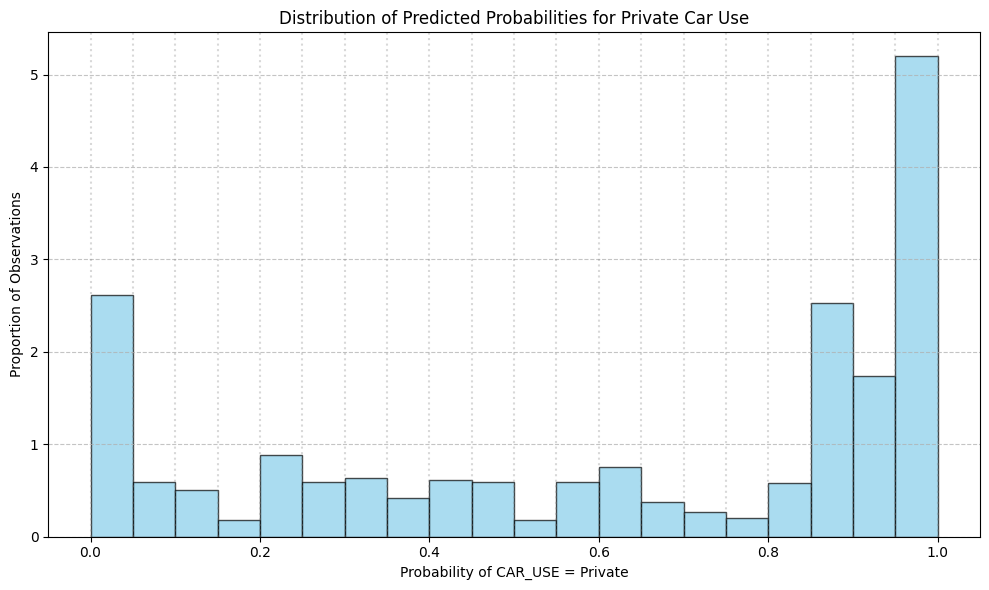

In [6]:
import matplotlib.pyplot as plt
import numpy as np

all_predictions_proba = naive_bayes_model.predict_proba(X_encoded_nb)

private_idx = np.where(naive_bayes_model.classes_ == 'Private')[0][0]

private_probabilities = all_predictions_proba[:, private_idx]

plt.figure(figsize=(10, 6))
bins = np.arange(0, 1.05, 0.05) 

plt.hist(private_probabilities, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')

plt.xlabel('Probability of CAR_USE = Private')
plt.ylabel('Proportion of Observations')
plt.title('Distribution of Predicted Probabilities for Private Car Use')
plt.grid(axis='y', alpha=0.75, linestyle='--')

for edge in bins:
    plt.axvline(x=edge, color='gray', linestyle=':', alpha=0.3)

plt.tight_layout()
plt.show()

### 1.g (4 marks)
Using a classification threshold of 0.6 i.e., the class with a probability >= 0.6 is the correct output, what is the misclassification rate (computed on **all the observations**) of the `CategoricalNB` model?

In [7]:
all_predictions_proba = naive_bayes_model.predict_proba(X_encoded_nb)

private_idx = np.where(naive_bayes_model.classes_ == 'Private')[0][0]
commercial_idx = np.where(naive_bayes_model.classes_ == 'Commercial')[0][0]

all_actual_labels = data['CAR_USE'].values

custom_predictions = []
for prob in all_predictions_proba:
    if prob[private_idx] >= 0.6:
        custom_predictions.append('Private')
    elif prob[commercial_idx] >= 0.6:
        custom_predictions.append('Commercial')
    else:
        if prob[private_idx] > prob[commercial_idx]:
            custom_predictions.append('Private')
        else:
            custom_predictions.append('Commercial')

misclassification_count = sum(1 for pred, actual in zip(custom_predictions, all_actual_labels) if pred != actual)
misclassification_rate = misclassification_count / len(all_actual_labels)

print(f"Misclassification rate with threshold=0.6: {misclassification_rate:.4f}")

Misclassification rate with threshold=0.6: 0.1294


### Problem 2: Linear Regression (20 marks)

`lab02_dataset_2.csv` contains 238 observations on customer purchase history. You will use the observations in this dataset to train models that predict the loyalty score of a customer. The input features which will be used for your training are *age, annual_income, purchase_amount, purchase_frequency* and your output label is *loyalty_score*.

### 2.a (2 marks)

Use sklearn's [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and `fit_transform` to transform the input features. Then apply a train-test split of 80-20 to generate the training and testing sets.

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('lab02_dataset_2.csv')

features = ['age', 'annual_income', 'purchase_amount', 'purchase_frequency']
X = data[features]
y = data['loyalty_score']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (190, 4)
Testing set shape: (48, 4)


### 2.b (10 marks)
Complete the empty functions inside the `myLinearRegression` class so that you can be perform linear regression **without using sklearn**. You are free to add additional helper functions if you need them. We will use a learning rate of 0.01 and 1000 training iterations for the learning task.

In [9]:
class myLinearRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0
        self.X = X
        self.y = y
        
        for i in range(self.iterations):
            y_pred = self.predict(self.X)
            
            dw = -(2/self.m) * np.dot(self.X.T, (self.y - y_pred))
            db = -(2/self.m) * np.sum(self.y - y_pred)
            
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            
        return self
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

model = myLinearRegression(learning_rate = 0.01, iterations = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

### 2.c (2 marks)
Compute and output the `mean_squared_error` between the prediction and the true test labels.

In [10]:

model = myLinearRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse:.4f}")


Mean Squared Error on test set: 0.0471


### 2.d (6 marks)
Now using sklearn's [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) and [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) learn two corresponding models using the same training set and test it on the test set. Output the `mean_squared_error` of both the models.

In [11]:
from sklearn.linear_model import SGDRegressor, LinearRegression

sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, learning_rate='constant', eta0=0.01)
sgd_model.fit(X_train, y_train)
sgd_pred = sgd_model.predict(X_test)
sgd_mse = mean_squared_error(y_test, sgd_pred)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

print(f"SGDRegressor Mean Squared Error: {sgd_mse:.4f}")
print(f"LinearRegression Mean Squared Error: {lr_mse:.4f}")

SGDRegressor Mean Squared Error: 0.0484
LinearRegression Mean Squared Error: 0.0371


### Problem 3: Regularization (15 marks)

`lab02_dataset_3.csv` has 6,435 observations pertaining to Walmart sales and employment. The input features for your training task are *Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI* and the output label is *Unemployment*. For this problem, you will be using regression with regularization. 

### 3.a (3 marks)

Use sklearn's [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and `fit_transform` to transform the input features.

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('lab02_dataset_3.csv')



features = ['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']
X = data[features]
y = data['Unemployment']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

### 3.b (4 marks)

Use sklearn's [`ridge_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ridge_regression.html) with `alpha=1.5` to compute the coefficients of the linear regression model. What are the two most important features (feature with the largest positive/negative weights are the most relevant)?

Feature coefficients from Ridge Regression (alpha=1.5):
        Feature  Coefficient  Abs_Coefficient
0  Weekly_Sales    -0.227182         0.227182
1  Holiday_Flag     0.062330         0.062330
2   Temperature     0.337542         0.337542
3    Fuel_Price    -0.223029         0.223029
4           CPI    -0.680484         0.680484

Features sorted by importance:
        Feature  Coefficient  Abs_Coefficient
4           CPI    -0.680484         0.680484
2   Temperature     0.337542         0.337542
0  Weekly_Sales    -0.227182         0.227182
3    Fuel_Price    -0.223029         0.223029
1  Holiday_Flag     0.062330         0.062330

The two most important features are: CPI and Temperature


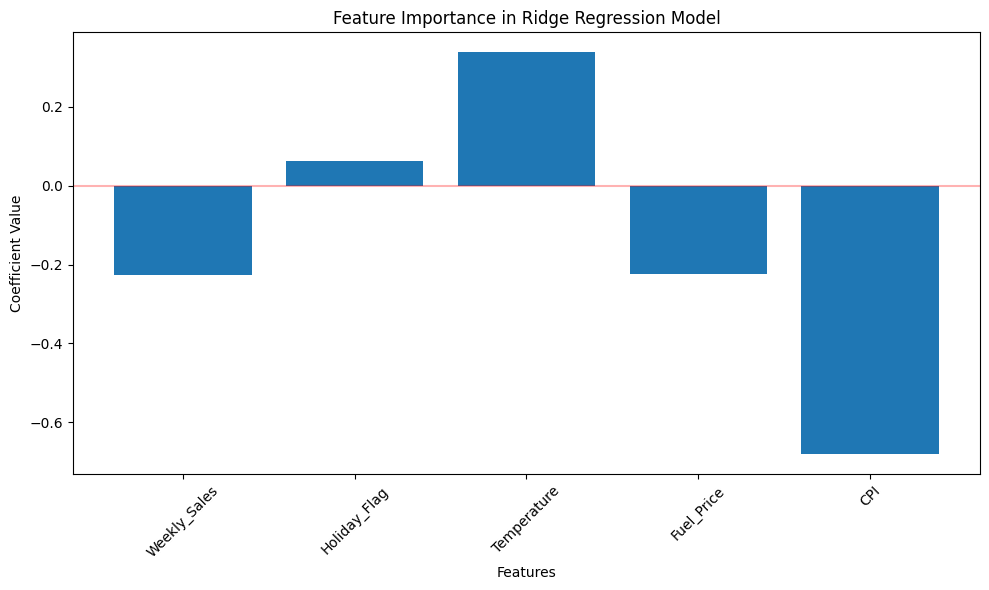

In [13]:
from sklearn.linear_model import ridge_regression

coefficients = ridge_regression(X_scaled, y, alpha=1.5)

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance_sorted = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("Feature coefficients from Ridge Regression (alpha=1.5):")
print(feature_importance)

print("\nFeatures sorted by importance:")
print(feature_importance_sorted)

top_features = feature_importance_sorted.head(2)['Feature'].values
print(f"\nThe two most important features are: {top_features[0]} and {top_features[1]}")

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression Model')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

Two most important features: Temperature and CPI.


### 3.c (4 marks)
Compute the Pearson correlation coefficient between the input features and the output.

Pearson correlation coefficients with Unemployment:
        Feature  Correlation  Abs_Correlation
0  Weekly_Sales    -0.106176         0.106176
1  Holiday_Flag     0.010960         0.010960
2   Temperature     0.101158         0.101158
3    Fuel_Price    -0.034684         0.034684
4           CPI    -0.302020         0.302020

Features sorted by correlation strength:
        Feature  Correlation  Abs_Correlation
4           CPI    -0.302020         0.302020
0  Weekly_Sales    -0.106176         0.106176
2   Temperature     0.101158         0.101158
3    Fuel_Price    -0.034684         0.034684
1  Holiday_Flag     0.010960         0.010960

Comparison with Ridge Regression feature importance:
        Feature  Ridge_Coefficient  Correlation  Abs_Ridge  Abs_Correlation
4           CPI          -0.680484    -0.302020   0.680484         0.302020
2   Temperature           0.337542     0.101158   0.337542         0.101158
0  Weekly_Sales          -0.227182    -0.106176   0.227182         0.106

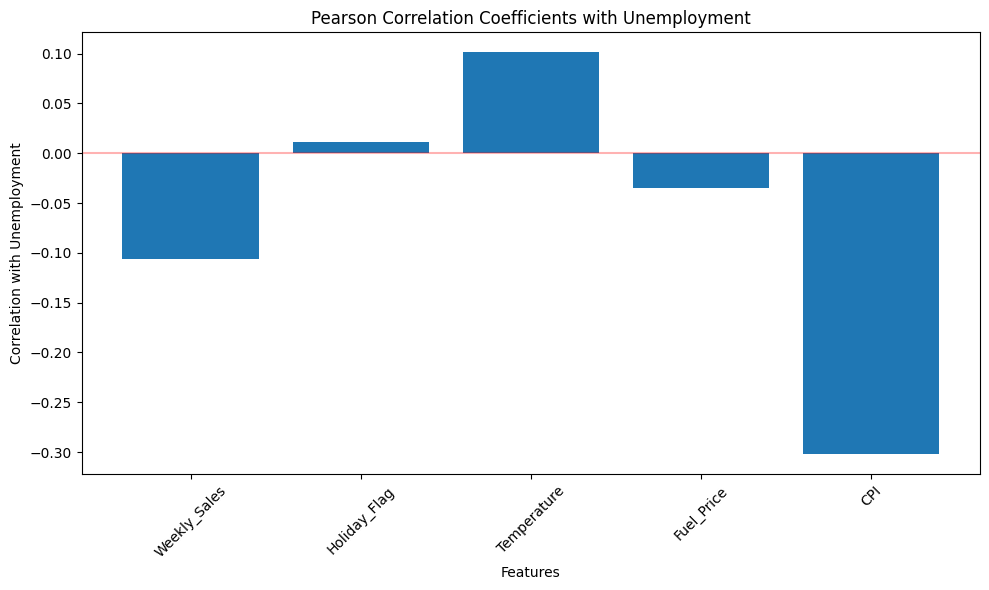

In [14]:
correlation_coefficients = {}
for feature in features:
    correlation = np.corrcoef(data[feature], data['Unemployment'])[0, 1]
    correlation_coefficients[feature] = correlation

correlation_df = pd.DataFrame(list(correlation_coefficients.items()), 
                             columns=['Feature', 'Correlation'])
correlation_df['Abs_Correlation'] = abs(correlation_df['Correlation'])
correlation_df_sorted = correlation_df.sort_values('Abs_Correlation', ascending=False)

print("Pearson correlation coefficients with Unemployment:")
print(correlation_df)

print("\nFeatures sorted by correlation strength:")
print(correlation_df_sorted)

print("\nComparison with Ridge Regression feature importance:")
comparison = pd.DataFrame({
    'Feature': features,
    'Ridge_Coefficient': feature_importance['Coefficient'],
    'Correlation': [correlation_coefficients[feature] for feature in features]
})
comparison['Abs_Ridge'] = abs(comparison['Ridge_Coefficient'])
comparison['Abs_Correlation'] = abs(comparison['Correlation'])
comparison = comparison.sort_values('Abs_Ridge', ascending=False)
print(comparison)

plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Feature'], correlation_df['Correlation'])
plt.xlabel('Features')
plt.ylabel('Correlation with Unemployment')
plt.title('Pearson Correlation Coefficients with Unemployment')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

The correlation coefficient aligns well with the feature importance as seen in 3.b. Yes 

### 3.d (4 marks)
Create a correlation heatmap using the input features and the output.

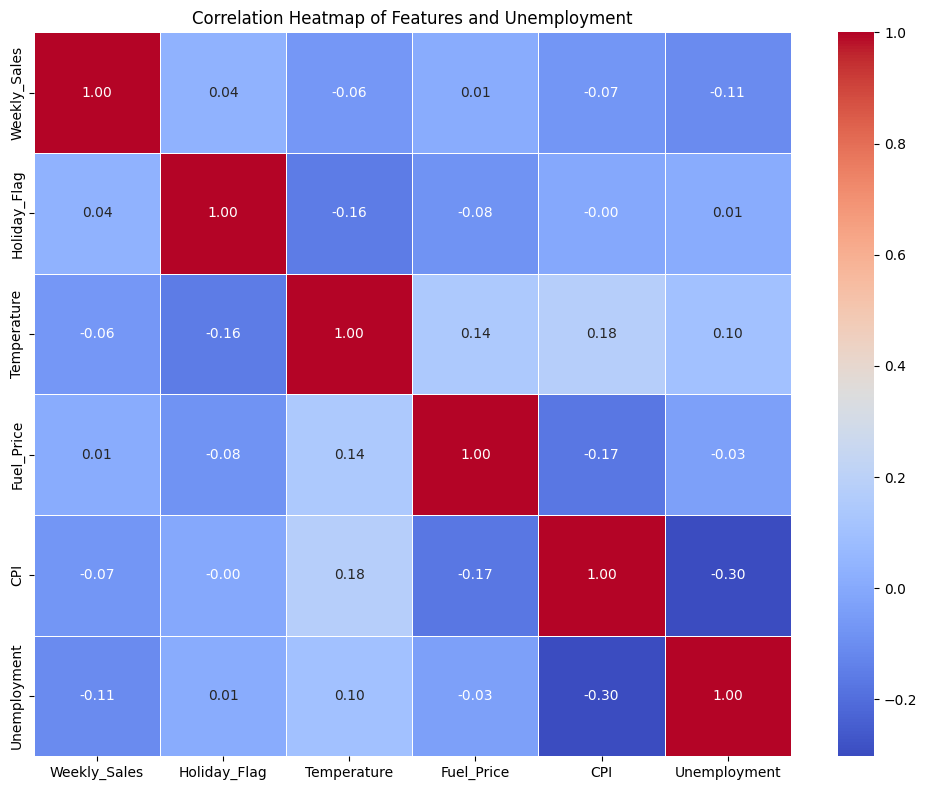

In [15]:
import seaborn as sns

features_with_target = features + ['Unemployment']
correlation_matrix = data[features_with_target].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features and Unemployment')
plt.tight_layout()
plt.show()
